[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ferminriv20/Sentiment-analysis-Bonga/blob/main/Sentimental_analysis_Bonga.ipynb)


# Análisis de sentimientos en reseñas de clientes del restaurante La Bonga del Sinú

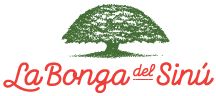

El análisis de sentimientos es una técnica ampliamente utilizada que permite identificar y clasificar emociones expresadas en un texto. En los últimos años, ha cobrado gran relevancia, especialmente en el ámbito empresarial, ya que se emplea con frecuencia para conocer el nivel de satisfacción del cliente respecto a un producto o servicio, con el fin de mejorar su experiencia de consumo. Esta técnica facilita comprender lo que piensan los usuarios sobre nuestros productos: qué aspectos valoran positivamente, de qué se quejan y cuáles son las desventajas que perciben. De este modo, es posible detectar debilidades y oportunidades de mejora que pueden ser abordadas estratégicamente.

En este estudio, se aplica el análisis de sentimientos a las opiniones de clientes del restaurante  [La Bonga del Sinú](https://www.labongadelsinu.co/web/),  este establecimiento es considerado uno de los más emblemáticos y representativos de la gastronomía cordobesa. El objetivo es analizar, a partir de reseñas y comentarios, la percepción general que tienen los comensales sobre el restaurante, destacando sus fortalezas y señalando posibles aspectos susceptibles de mejora.

## Obtención de los datos 

Los datos utilizados fueron recolectados desde la plataforma **TripAdvisor**, una de las más grandes y reconocidas a nivel mundial para la evaluación de servicios turísticos, incluyendo restaurantes. TripAdvisor permite a los usuarios compartir sus experiencias y opiniones sobre diversos establecimientos, lo que la convierte en una fuente valiosa de información para el análisis de 
sentimientos.


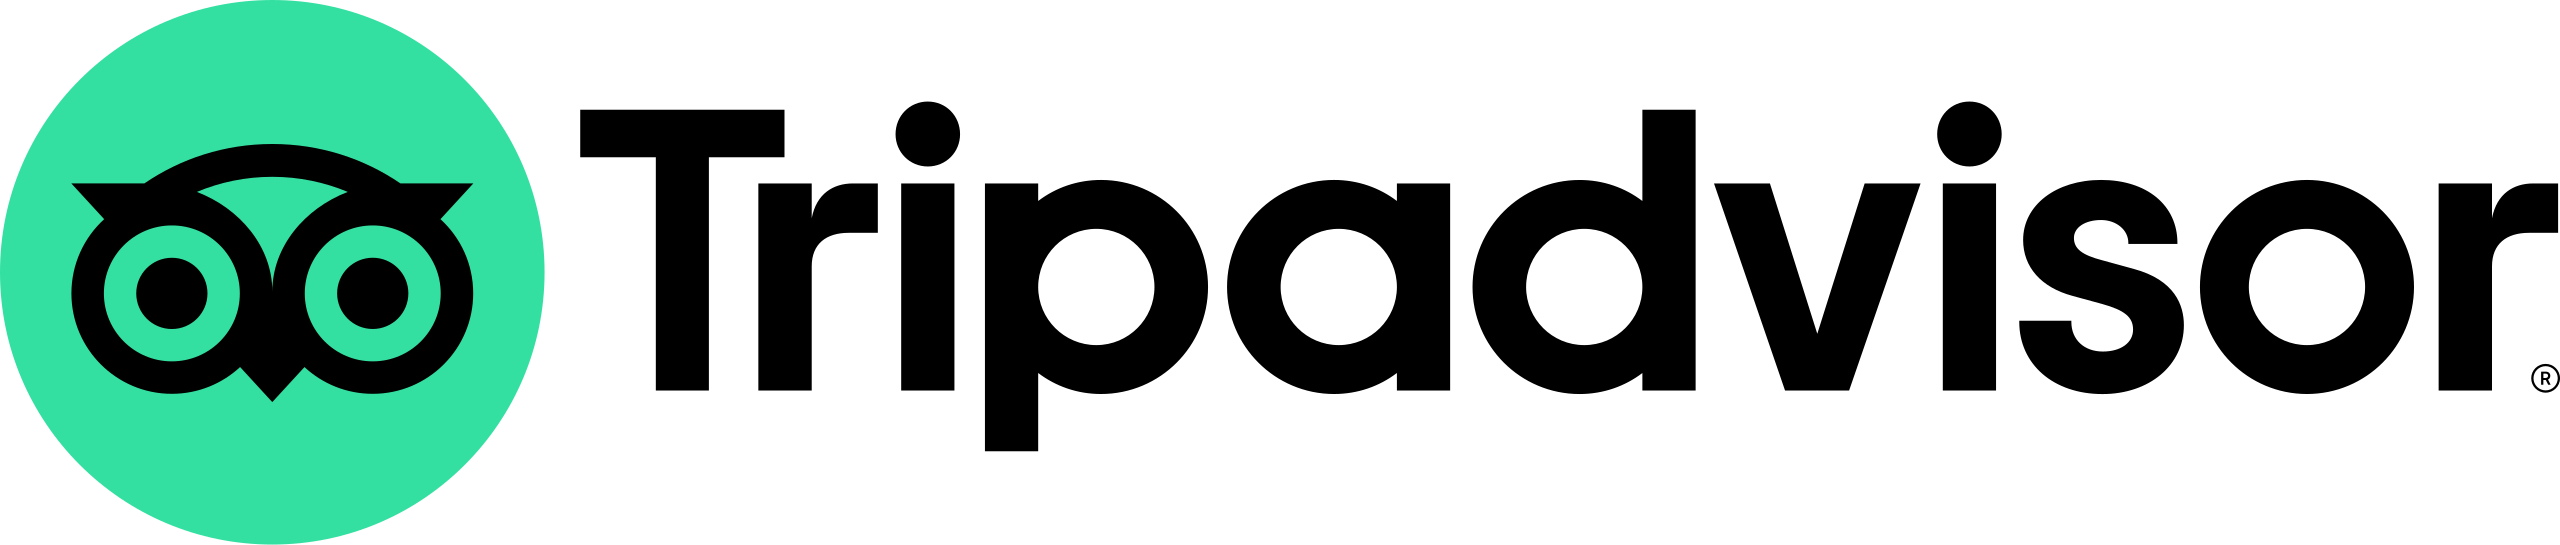


Para extraer las [reseñas](https://www.tripadvisor.co/Restaurant_Review-g609136-d5058649-Reviews-La_Bonga_Del_Sinu-Monteria_Cordoba_Department.html) correspondientes al restaurante La Bonga del Sinú, se utilizó la herramienta [**Tripadvisor Reviews Scraper**](https://apify.com/maxcopell/tripadvisor-reviews), una solución sencilla y eficiente que permite obtener comentarios e información detallada de cualquier lugar listado en la plataforma. 


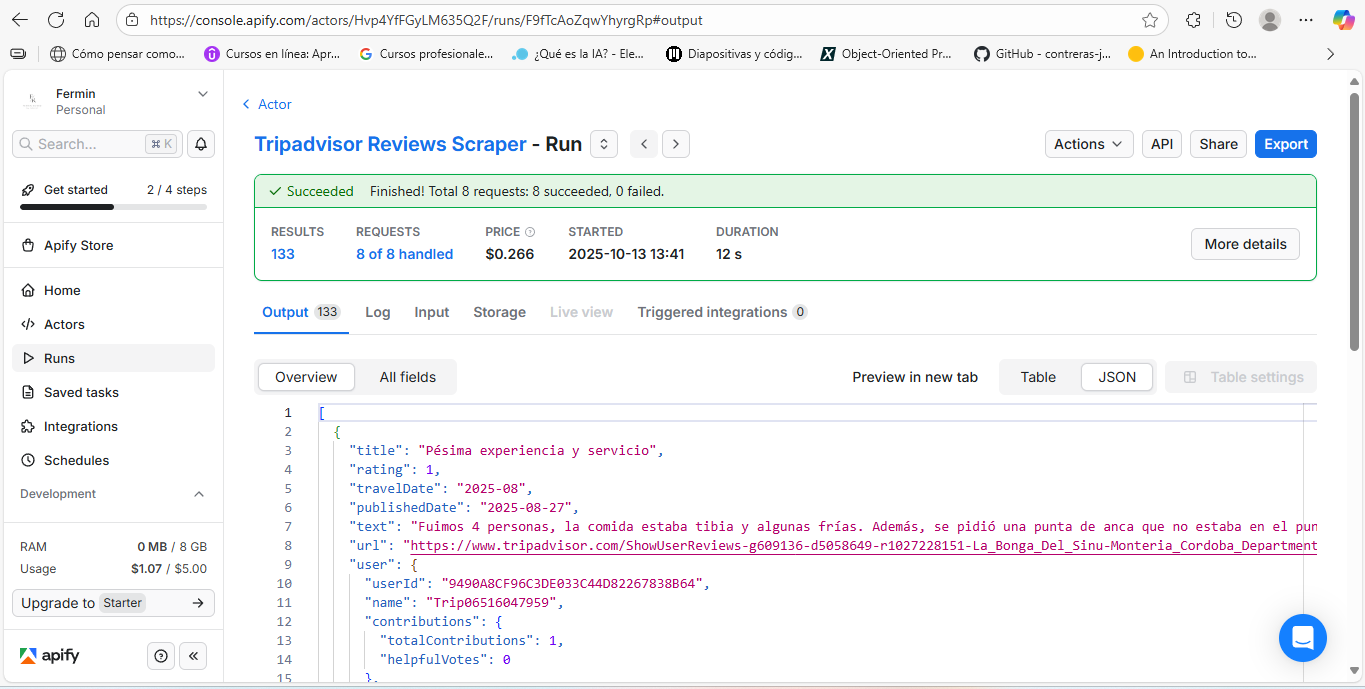


## carga de datos

In [1]:
#importamos las librerias a utilizar
import re
import nltk
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
import pandas as pd # data processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from transformers import pipeline
from collections import Counter
from wordcloud import WordCloud #Word visualization
from sklearn.feature_extraction.text import CountVectorizer
import tqdm as notebook_tqdm

import warnings
warnings.filterwarnings("ignore")

c:\Users\fermi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Descargas requeridas para NLP

In [2]:
# Descargamos algunos recursos necesarios para la limpieza de los datos
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')# Descargamos las stopwords(palabras comunes que se omiten en el procesamiento de texto)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fermi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\fermi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fermi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

El dataset obtenido reúne las opiniones de los usuarios según su experiencia en el restaurante. A continuación, se describe cada columna:

- `usuario`: nombre o identificador del autor de la reseña.
- `titulo`: encabezado breve que resume la reseña.
- `comentario`: texto completo de la opinión del usuario.
- `calidad_precio`: valoración de la relación entre lo recibido  y el precio pagado.
- `servicio`: apreciaciones sobre la atención del personal .
- `comida`: apreciaciones sobre platos y bebidas .
- `ambiente`: apreciaciones sobre el entorno .
- `calificacion`: puntuación global otorgada por el usuario, en una escala de 1 a 5.
- `fecha_publicacion`: fecha en que la reseña fue publicada.
- `tipo_asistencia`: con quién o cómo asistió la persona al restaurante (p. ej., solo, en pareja, en familia, con amigos, negocios).

In [3]:
df = pd.read_excel('data_bonga.xlsx')
df.head()

,usuario,titulo,comentario,calidad_precio,servicio,comida,ambiente,calificacion,fecha_publicacion,tipo_asistencia
0,Trip06516047959,Pésima experiencia y servicio,"Fuimos 4 personas, la comida estaba tibia y al...",1.0,1.0,2.0,3.0,1,2025-08-27,FAMILY
1,884nandp,No lo recomiendo,"Era muy buen restaurante, la carne ya no es ta...",2.0,3.0,2.0,3.0,3,2025-08-14,NONE
2,W8784MHjorgeg,Gastronomía recomendable.,Menú propio de la costa sabanera y ganadera. E...,4.0,5.0,5.0,5.0,4,2025-05-29,COUPLES
3,evamC8338OL,Mala experiencia,La comida malísima las carnes que pedimos mal ...,NaN,NaN,NaN,NaN,1,2025-03-02,COUPLES
4,Katiaeme75,Restaurante imperdible en Monteria,Muy buena carne y comida típica de la región. ...,5.0,5.0,5.0,5.0,5,2024-08-25,FAMILY


Encontramos las dimensiones del dataset

In [4]:
df.shape

(133, 10)

Se accede  a la información general del dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   usuario            133 non-null    object 
 1   titulo             133 non-null    object 
 2   comentario         133 non-null    object 
 3   calidad_precio     45 non-null     float64
 4   servicio           44 non-null     float64
 5   comida             44 non-null     float64
 6   ambiente           21 non-null     float64
 7   calificacion       133 non-null    int64  
 8   fecha_publicacion  133 non-null    object 
 9   tipo_asistencia    133 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 10.5+ KB


Observemos la cantidad de valores nulos  en cada campo.

In [6]:
df.isnull().sum()

usuario                0
titulo                 0
comentario             0
calidad_precio        88
servicio              89
comida                89
ambiente             112
calificacion           0
fecha_publicacion      0
tipo_asistencia        0
dtype: int64

Las subcategorías calidad/precio, comida, ambiente y servicio presentan alta proporción de valores faltantes. Para evitar conclusiones engañosas, sus resultados se muestran con carácter informativo y no se priorizan en el análisis.

Revisemos si existen valores duplicados

In [7]:
df.duplicated().sum()

np.int64(0)

Seleccionamos las columnas que son de nuestro interes para cumplir con el objetivo del estudio y realizamos las transformaciones pertinentes.

In [8]:
bonga= df[['comentario','calificacion','fecha_publicacion','tipo_asistencia']]

In [9]:
bonga["tipo_asistencia"].value_counts()

tipo_asistencia
FAMILY      38
FRIENDS     27
BUSINESS    23
NONE        19
COUPLES     17
0            6
SOLO         3
Name: count, dtype: int64

Se identificaron 19 registros clasificados bajo la categoría `NONE` y 6 registros con el valor de asistencia igual a `0`. Ambas opciones pueden interpretarse como equivalentes, ya que indican que dichas personas no asistieron a ninguna de las categorías definidas en el conjunto de datos. Por lo tanto, se procederá a agrupar ambos casos bajo una única categoría denominada `Ninguna`, con el fin de unificar criterios y facilitar el análisis posterior.

In [10]:
for category in bonga["tipo_asistencia"]:
    if category == "NONE" or category == 0 :
        bonga["tipo_asistencia"] = bonga["tipo_asistencia"].replace(category,"Ninguna")

In [11]:
bonga["tipo_asistencia"].value_counts() 

tipo_asistencia
FAMILY      38
FRIENDS     27
Ninguna     25
BUSINESS    23
COUPLES     17
SOLO         3
Name: count, dtype: int64

In [12]:
# Convertimos la columna de fecha a tipo datetime
bonga['fecha_publicacion'] = pd.to_datetime(bonga['fecha_publicacion'])

## Preprocesamiento de texto

Antes de aplicar los modelos de análisis de sentimientos, es fundamental garantizar la correcta normalización y limpieza de los datos textuales. Este proceso permite reducir el ruido, mejorar la calidad de la información y asegurar resultados más precisos. En este caso se utilizan las siguientes fases:

- `Tokenización:` Consiste en dividir el texto en unidades mínimas llamadas tokens, generalmente palabras individuales.

- `Lowercasing`: Se transforman todos los caracteres a minúsculas para evitar duplicidades y garantizar uniformidad en el análisis.

- `Removing Punctuation`: Se suprimen todos los signos de puntuación, ya que no aportan valor semántico y pueden interferir en el procesamiento.

- `Stop Words Removal` : Se eliminan palabras comunes como “y”, “la”, “los”, entre otras, que no tienen un significado relevante para el análisis de sentimientos.

In [13]:
def clean_text(texto):
  '''Realiza la limpieza  aplicando las fases de prepocesamiento de un texto.
  Args :
       texto (str) : Texto a limpiar.
      Returns :
       str : Texto limpio.
  '''
  # Combinar stopwords en español e inglés
  texto = texto.lower()  # Convertir a minúsculas
  texto = re.sub(r'[^\w\s]', '', texto)   #se eliminan los signos de puntuación
  palabras = word_tokenize(texto)  # Tokenizar el texto
  palabras_limpias = [palabra for palabra in palabras if palabra not in set(stopwords.words('spanish')) | set(stopwords.words('english'))]   # Se eliminan las stopwords del texto ()
  return ' '.join(palabras_limpias)

In [14]:
bonga["comentario_limpio"] = bonga["comentario"].apply(clean_text)
bonga[["comentario","comentario_limpio"]]

,comentario,comentario_limpio
0,"Fuimos 4 personas, la comida estaba tibia y al...",4 personas comida tibia frías además pidió pun...
1,"Era muy buen restaurante, la carne ya no es ta...",buen restaurante carne tan rica pedí corte pun...
2,Menú propio de la costa sabanera y ganadera. E...,menú propio costa sabanera ganadera excelente ...
3,La comida malísima las carnes que pedimos mal ...,comida malísima carnes pedimos mal preparadas ...
4,Muy buena carne y comida típica de la región. ...,buena carne comida típica región ambiente camp...
...,...,...
128,Es el restaurante que representa el sabor de l...,restaurante representa sabor región carnes est...
129,Mucho mejor que la Bonga de Bogotá en su ambie...,mejor bonga bogotá ambiente calidad carnes ser...
130,"Cortes de muy buena carne, sin embargo su cali...",cortes buena carne embargo calidad servicio id...
131,"No se q sucede con la bonga,, quizas ya se vol...",q sucede bonga quizas volvieron comerciales de...


## Análisis de sentimientos

Debido a la limitación en la cantidad de datos que tenemos vamos a usar un modelo preentrenado para clasificar los sentimientos encontrados en cada uno de los comentarios.


In [15]:
# Crear un pipeline de análisis de sentimientos usando un modelo preentrenado
analizador_sentimientos = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
def clasificar_comentario(comentario):
  '''Clasifica un comentario en una escala de 1 a 5 estrellas.
  Args :
       comentario (str) : Comentario a clasificar.
  Returns :
       str : Categoría a la que pertenece el comentario.
  '''
  resultado = analizador_sentimientos(comentario)
  return resultado[0]['label']
  
# Función para clasificar las valoraciones
def clasificar_valoracion(estrellas):
    if estrellas in ["1 star", "2 stars"]:
        return 'Negativa'
    elif estrellas == "3 stars":
        return 'Neutra'
    elif estrellas in ["4 stars", "5 stars"]:
        return 'Positiva'

Device set to use cpu


In [16]:
bonga['Sentimiento'] = bonga['comentario'].apply(clasificar_comentario)
bonga[["comentario",'Sentimiento',"calificacion"]]

,comentario,Sentimiento,calificacion
0,"Fuimos 4 personas, la comida estaba tibia y al...",1 star,1
1,"Era muy buen restaurante, la carne ya no es ta...",2 stars,3
2,Menú propio de la costa sabanera y ganadera. E...,5 stars,4
3,La comida malísima las carnes que pedimos mal ...,1 star,1
4,Muy buena carne y comida típica de la región. ...,5 stars,5
...,...,...,...
128,Es el restaurante que representa el sabor de l...,5 stars,5
129,Mucho mejor que la Bonga de Bogotá en su ambie...,5 stars,5
130,"Cortes de muy buena carne, sin embargo su cali...",2 stars,3
131,"No se q sucede con la bonga,, quizas ya se vol...",2 stars,3


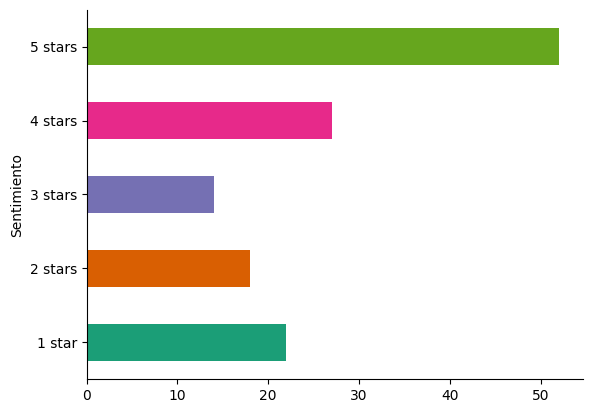

In [17]:
bonga.groupby('Sentimiento').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

A partir del modelo preentrenado utilizado, cada comentario es evaluado y clasificado en una escala de 1 a 5 estrellas, donde cada nivel representa una intensidad emocional:

1 estrella: Muy negativo

2 estrellas: Negativo

3 estrellas: Neutro

4 estrellas: Positivo

5 estrellas: Muy positivo

Para efectos del análisis de satisfacción, se considera que los clientes satisfechos son aquellos cuya opinión fue clasificada con 4 o 5 estrellas. Esta agrupación permite calcular el CSAT (Customer Satisfaction Score), una métrica que refleja el porcentaje de usuarios satisfechos según la evaluación automática del modelo.

In [18]:
# Calcular porcentaje de clientes satisfechos
csat = (bonga['Sentimiento'].isin(['4 stars', '5 stars']).sum() / len(bonga)) * 100
print(f"CSAT estimado por el modelo: {csat:.2f}%")

CSAT estimado por el modelo: 59.40%


In [19]:
# Verifiquemos el tipo de sentimiento
bonga["Tipo_sentimiento"] = bonga["Sentimiento"].apply(clasificar_valoracion)
bonga[["Sentimiento","Tipo_sentimiento"]]

,Sentimiento,Tipo_sentimiento
0,1 star,Negativa
1,2 stars,Negativa
2,5 stars,Positiva
3,1 star,Negativa
4,5 stars,Positiva
...,...,...
128,5 stars,Positiva
129,5 stars,Positiva
130,2 stars,Negativa
131,2 stars,Negativa


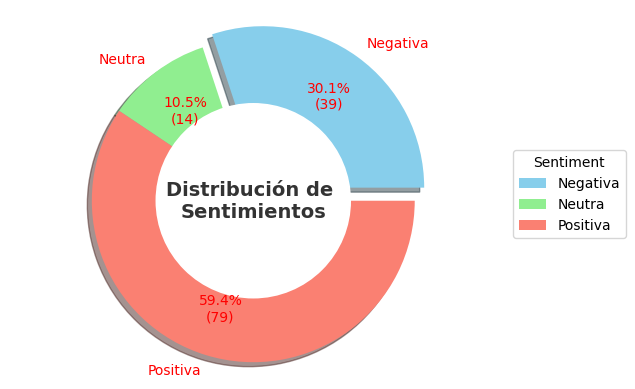

In [20]:
colors = ['#87CEEB', '#90EE90', '#FA8072']
explode = (0.1, 0, 0)  
sentiment_counts = bonga.groupby("Tipo_sentimiento").size()
fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="r"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)
ax.text(0, 0, 'Distribución de \nSentimientos', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')
ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.axis('equal')  

plt.show()

Text(0.5, 1.0, 'Distribución de Calificaciones')

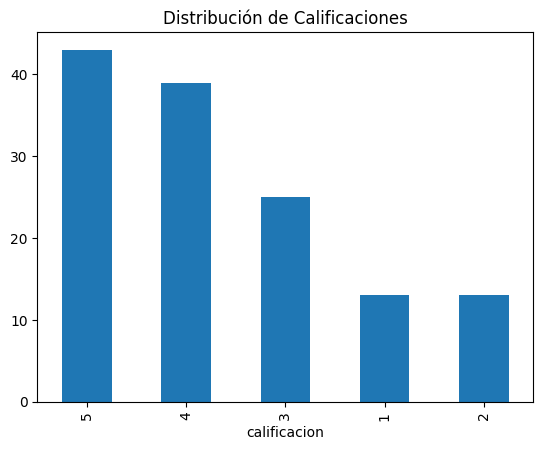

In [21]:
bonga["calificacion"].value_counts().plot(kind='bar')
plt.title('Distribución de Calificaciones')

In [22]:
bonga["calificacion"].mean()

np.float64(3.6466165413533833)

Text(0.5, 1.0, 'Distribución de Tipo de Asistencia')

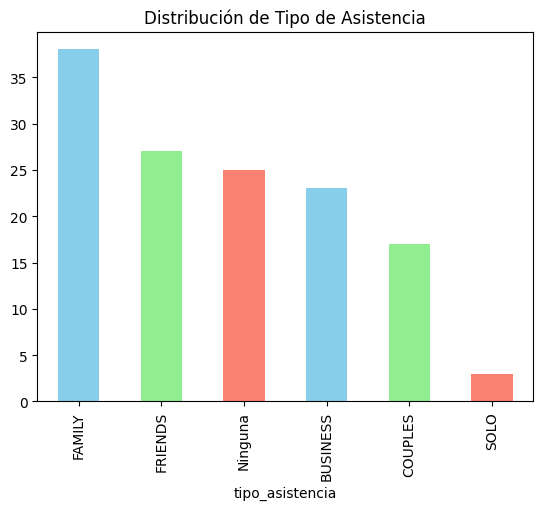

In [23]:
bonga["tipo_asistencia"].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribución de Tipo de Asistencia')

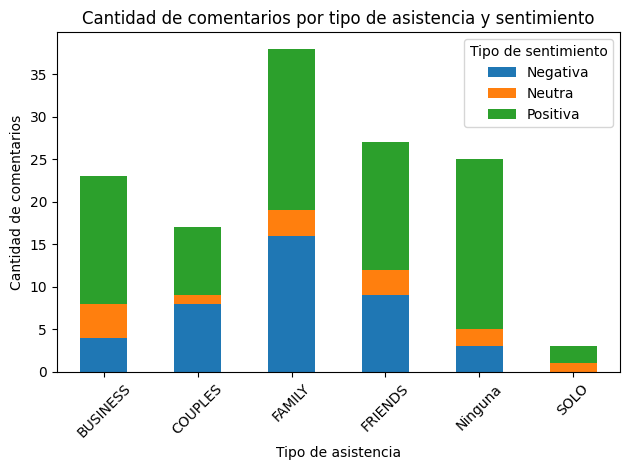

In [24]:
# Contar la cantidad de comentarios de cada tipo de sentimiento por tipo de asistencia
asistencia_sentimientos = bonga.groupby(['tipo_asistencia', 'Tipo_sentimiento']).size().unstack(fill_value=0)
asistencia_sentimientos.plot(kind='bar', stacked=True)
plt.title('Cantidad de comentarios por tipo de asistencia y sentimiento')
plt.ylabel('Cantidad de comentarios')
plt.xlabel('Tipo de asistencia')
plt.xticks(rotation=45)
plt.legend(title='Tipo de sentimiento')
plt.tight_layout()
plt.show()

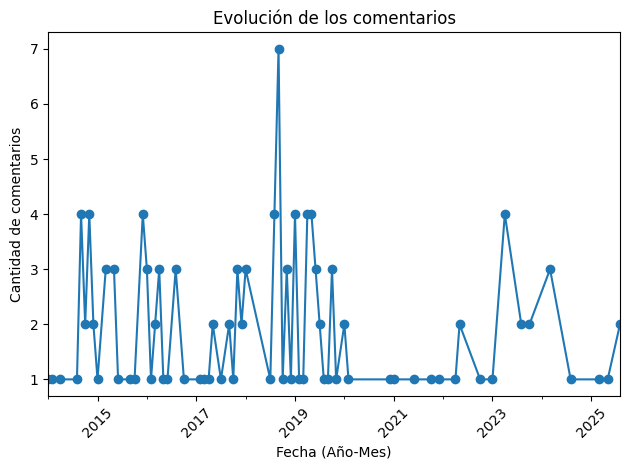

In [25]:
# Contamos la cantidad de comentarios por mes y año
comentarios_por_fecha = bonga.groupby(bonga['fecha_publicacion'].dt.to_period('M')).size()
# Graficamos la evolución de los comentarios a lo largo del tiempo
comentarios_por_fecha.plot(kind='line', marker='o')
plt.title('Evolución de los comentarios')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('Cantidad de comentarios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El análisis de los comentarios se realiza mediante el uso de `n-gramas`, específicamente bigramas y trigramas, ya que permiten capturar expresiones compuestas que ofrecen una visión más rica y contextual del contenido

In [26]:
# Función para generar nubes de n-gramas por sentimiento
def nube_ngrams_por_sentimiento(df, sentimiento, ngram_range=(2, 3), color='white', colormap='Dark2'):
    # Filtrar comentarios por sentimiento
    comentarios = df[df['Tipo_sentimiento'] == sentimiento]['comentario_limpio'].tolist()
    # Crear vectorizador de n-gramas
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(comentarios)
    # Obtener n-gramas y frecuencias
    ngrams = vectorizer.get_feature_names_out()
    frecuencias = X.toarray().sum(axis=0)
    frecuencia_dict = dict(zip(ngrams, frecuencias))
    # Generar nube
    nube = WordCloud(width=1000, height=500, background_color=color, colormap=colormap)\
        .generate_from_frequencies(frecuencia_dict)
    # Mostrar
    plt.figure(figsize=(15, 7))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de N-gramas - Sentimiento {sentimiento}')
    plt.show()

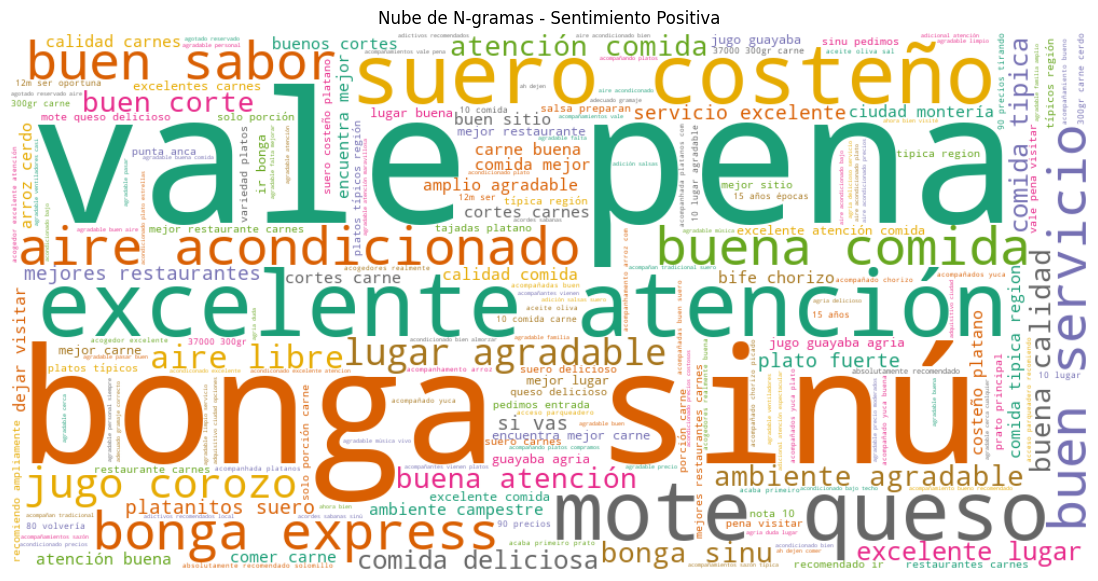

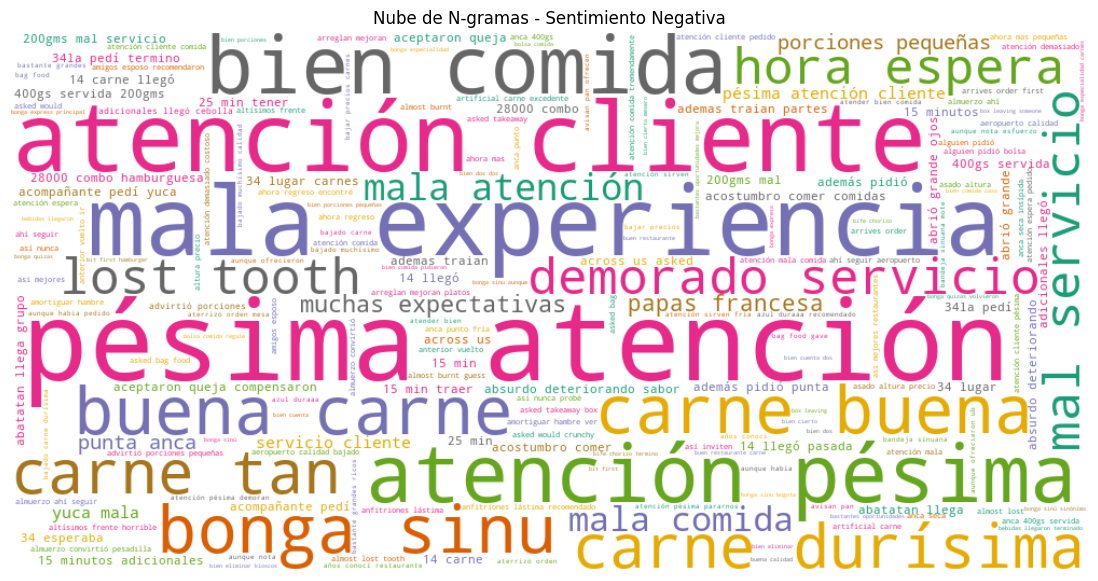

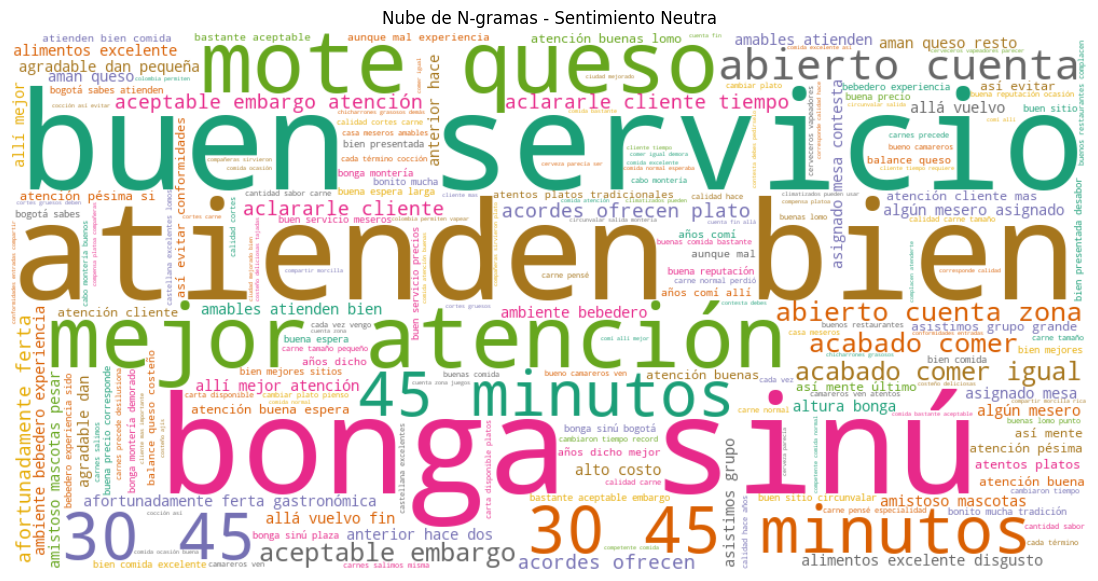

In [27]:
for tipo in ['Positiva', 'Negativa', 'Neutra']:
    nube_ngrams_por_sentimiento(bonga, tipo)


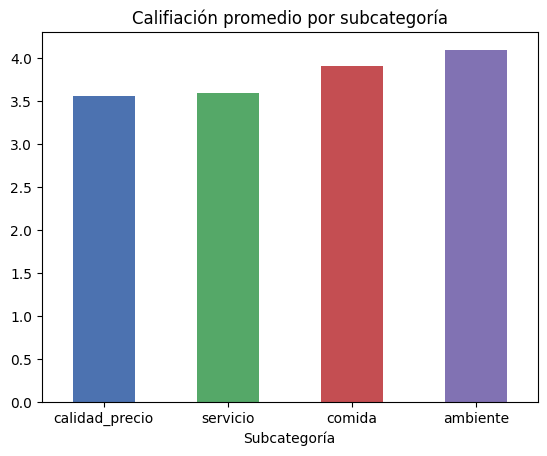

In [28]:
# Contamos la cantidad de valores no nulos (reseñas) para cada subcategoría
conteo_subcategorias = df[['calidad_precio', 'servicio', 'comida', 'ambiente']].mean()
# Graficamos el conteo
conteo_subcategorias.plot(kind='bar', color=['#4C72B0', '#55A868', '#C44E52', '#8172B3'])
plt.title('Califiación promedio por subcategoría')
plt.xlabel('Subcategoría')
plt.xticks(rotation=0)
plt.show()

### Conclusiones

El estudio revela la percepción general que tienen los clientes sobre el restaurante La Bonga del Sinú, destacando varios aspectos clave:

- La puntuación media de los 133 comentarios analizados es de 3,65/5. Al agrupar las calificaciones en tres categorías (positiva = 4–5 estrellas, neutra = 3, negativa = 1–2) se obtiene un 61 % de opiniones positivas, 19 % de neutras y 20 % de negativas, lo que equivale a una CSAT  de alrededor del 60 %. Aunque la mayoría de clientes están satisfechos, el segmento negativo es significativo.

- De forma general, las percepciones sobre el restaurante son favorables. Los clientes destacan  en la comida  reseñas positivas  donde abundan elogios como “buena comida”, “excelente carne”, “vale la pena”, “suero costeño” o “mote de queso”.Tambien describen  la atención, el servicio y el sabor  como excelentes y recomendables.

- El análisis de bigramas en reseñas negativas destaca expresiones como “pésima atención”, “mala atención”, “hora espera” o “demora atención”. Los clientes mencionan largas esperas para ser atendidos o servidos y un trato descuidado; este factor aparece como la principal fuente de insatisfacción.  En el mismo sentido, se enceuntran bigramas referentes a la comida como  “mala comida”, “estaba dura” y referencias puntuales a platos insatisfactorios como la hamburguesa.

- Aunque se registran distintas situaciones (“Family”, “Couples”, “Friends”, etc.), el número de reseñas por grupo es muy bajo para establecer diferencias significativas. Para extraer patrones de comportamiento por segmento será necesario reunir más datos.

- Aunque solo 45 reseñas incluyen la subvaloración calidad_precio, su media es la más baja de las categorías disponibles (3,56/5). Palabras como “caro”, “porción mínima” y “precio alto” surgen en los comentarios negativos. Esto sugiere que algunos comensales perciben desajuste entre lo que pagan y lo que reciben.

- Solo 21 clientes evaluaron el ambiente y la mayoría lo calificó bien (4,09/5). Comentarios positivos citan un lugar agradable, mientras que las quejas se centran en ruidos o falta de limpieza, aunque no son frecuentes.











## Limitaciones


El análisis presenta algunas limitaciones importantes que deben tenerse en cuenta al interpretar los resultados. Las columnas relacionadas con calidad-precio, comida, servicio y ambiente contienen un alto porcentaje de valores faltantes (superior al 70 %), lo que compromete la fiabilidad de cualquier conclusión específica por aspecto. Por ello, se recomienda considerar estas variables como indicativas y evitar extrapolar tendencias sin ampliar la muestra o aplicar técnicas de imputación más robustas.

Además, se observa un sesgo temporal en el volumen de reseñas: la mayoría se concentra en los primeros años del periodo analizado, con una disminución significativa a partir de 2020. Esto puede distorsionar la percepción sobre la experiencia reciente en el restaurante. También se detectó una duplicación puntual de reseñas por parte de un mismo usuario, aunque sin impacto relevante en el análisis general. En cuanto al modelo de sentimiento utilizado, se empleó una arquitectura preentrenada que asigna una calificación de 1 a 5 estrellas según el texto. Si bien esto permite estimar métricas como el CSAT, no reemplaza una encuesta formal de satisfacción (escala 0–10) ni un sistema de etiquetado humano, por lo que sus resultados deben interpretarse como aproximaciones.

## Recomendaciones de mejora

Con base en los hallazgos, se recomienda mejorar la atención al cliente y reducir los tiempos de espera, mediante capacitaciones al personal y ajustes operativos que agilicen el servicio, ya que estas son las principales fuentes de insatisfacción. Asimismo, es clave mantener la consistencia y calidad de los platos, estandarizando procesos para evitar variaciones negativas. Finalmente, se sugiere potenciar los aspectos valorados positivamente, destacando en la comunicación los productos más apreciados (el mote de queso, el suero costeño y los cortes de carne ) y reforzando la ambientación del lugar, que los clientes describen como agradable.

En resumen, el restaurante conserva un volumen significativo de opiniones positivas, especialmente en lo relacionado con la calidad de la comida y el ambiente. Sin embargo, el aumento progresivo de reseñas negativas en los últimos años ha estado enfocada  en aspectos como demoras, inconsistencias en el servicio y percepciones sobre la relación calidad-precio, lo cual nos revela una oportunidad concreta de mejora. Abordar estos puntos críticos, ampliar la recolección de datos y establecer un monitoreo continuo de la satisfacción del cliente serán pasos clave para revertir esta tendencia y fortalecer la reputación de La Bonga del Sinú.